<Figure size 4000x2000 with 0 Axes>

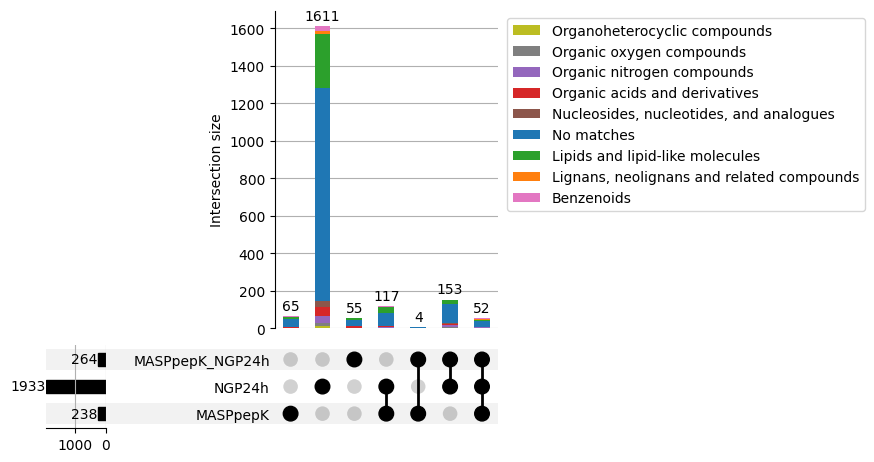

In [2]:
# the main reason to have this upset plot is that 
# we want to see the overlap of features impacted by the different vaccines.

import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme(color_codes=True)
from matplotlib.pyplot import gcf
from upsetplot import UpSet
from matplotlib import cm

# import superclass information from molnetenhancer data.
# features in rows.
data_b = pandas.read_csv("06232022-pos-all-metabolites-list.csv")
data_b = data_b.set_index(['filename'])
mass_class_series = data_b.pop("class")

data_1 = pandas.read_csv("pos-all-wilcox-MASP-adjuvant-adjpval-cutoff.csv")
data_1 = data_1.set_index(['filename'])

data_2 = pandas.read_csv("pos-all-wilcox-NGP24h-adjuvant-adjpval-cutoff.csv")
data_2 = data_2.set_index(['filename'])

data_3 = pandas.read_csv("pos-all-wilcox-MASP-NGP24h-adjuvant-adjpval-cutoff.csv")
data_3 = data_3.set_index(['filename'])

col_colors = pandas.DataFrame(data_1).join(pandas.DataFrame(data_2),how='outer'
                                          ).join(pandas.DataFrame(data_3),how='outer'
                                                ).join(pandas.DataFrame(mass_class_series), how = 'inner')

col_colors = col_colors.set_index(col_colors.MASPpepK == 1
                                 ).set_index(col_colors.NGP24h == 1, append=True
                                            ).set_index(col_colors.MASPpepK_NGP24h == 1, append=True)

impacted_color = {'No matches':(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
           'Lignans, neolignans and related compounds':(1.0, 0.4980392156862745, 0.054901960784313725), 
           'Lipids and lipid-like molecules':(0.17254901960784313, 0.6274509803921569, 0.17254901960784313), 
           'Organic acids and derivatives':(0.8392156862745098, 0.15294117647058825, 0.1568627450980392), 
           'Organic nitrogen compounds':(0.5803921568627451, 0.403921568627451, 0.7411764705882353),
           'Nucleosides, nucleotides, and analogues':(0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
           'Benzenoids':(0.8901960784313725, 0.4666666666666667, 0.7607843137254902), 
           'Organic oxygen compounds':(0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
           'Organoheterocyclic compounds':(0.7372549019607844, 0.7411764705882353, 0.13333333333333333)}

# plot the upset plot
upset = UpSet(col_colors,show_counts = True, intersection_plot_elements=0, sort_categories_by = None, element_size=30)  # disable the default bar chart
upset.add_stacked_bars(by='class', colors=impacted_color, title="Intersection size", elements=10)
plt.figure(figsize = (40, 20))
plt.style.use('default')
upset.plot()
plt.legend(bbox_to_anchor=(1.01,1))
plt.suptitle("")
plt.savefig("upsetplot-pos-all-metabolites.png", dpi = 300, bbox_inches = 'tight')
